In [1]:
import pandas as pd
import sqlite3

## Сделать подключение к базе данных

In [2]:
connection = sqlite3.connect('data/checking-logs.sqlite')

## Выполнить запрос, который получает дату и время из таблицы просмотров страниц

In [3]:
query = '''
SELECT datetime
FROM pageviews
WHERE uid != 'admin_%'
'''
df = pd.read_sql(query, connection)
df

,datetime
0,2020-04-17 12:01:08.463179
1,2020-04-17 12:01:23.743946
2,2020-04-17 12:17:39.287778
3,2020-04-17 12:17:40.001768
4,2020-04-17 12:27:30.646665
...,...
1075,2020-05-21 23:23:49.995349
1076,2020-05-21 23:49:22.386789
1077,2020-05-22 10:36:14.662600
1078,2020-05-22 11:30:18.368990


## Создайте новый фрейм данных, в котором посещения подсчитываются и группируются по дате

In [4]:
df['date'] = pd.to_datetime(df['datetime']).dt.date
visits_per_day = df.groupby('date').size()
visits_per_day.sum

<bound method Series.sum of date
2020-04-17     13
2020-04-18     29
2020-04-19     20
2020-04-20      2
2020-04-21      8
2020-04-22      8
2020-04-23      9
2020-04-24      6
2020-04-25      1
2020-04-26     11
2020-04-27      2
2020-04-28      7
2020-04-29     13
2020-04-30     12
2020-05-01      5
2020-05-02      6
2020-05-03     19
2020-05-04      2
2020-05-05      1
2020-05-06      3
2020-05-07      3
2020-05-08     50
2020-05-09     20
2020-05-10    111
2020-05-11    204
2020-05-12     86
2020-05-13    103
2020-05-14    192
2020-05-15     31
2020-05-16      4
2020-05-17      9
2020-05-18     51
2020-05-19     12
2020-05-20     12
2020-05-21     12
2020-05-22      3
dtype: int64>

## Используя метод Pandas .plot(), создайте график
- размер шрифта должен быть 8
- размер фигуры (15,8)
- график должен иметь заголовок Views per day в день
- x-тики повернуты на 45 градусов

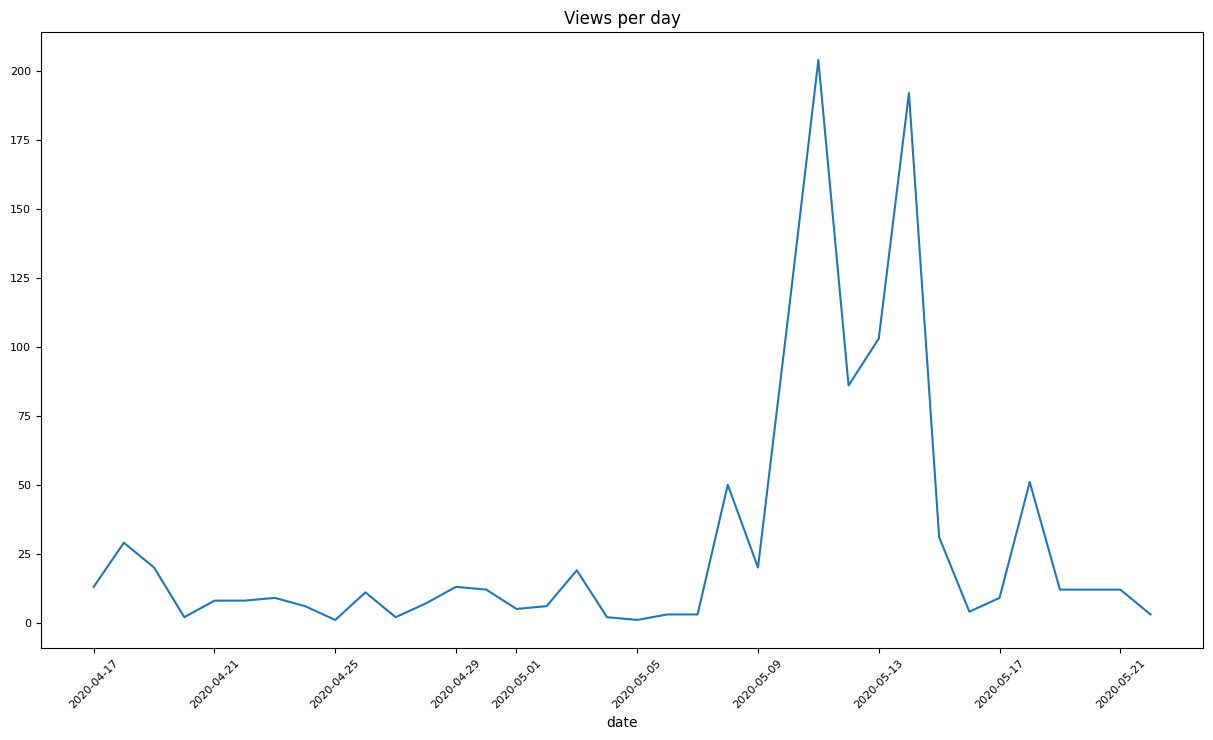

In [5]:
graph = visits_per_day.plot(
    kind='line',
    figsize=(15, 8),
    fontsize=8,
    title='Views per day',
    rot=45
)

## Закрыть соединение с базой данных

In [6]:
connection.close()